# Going to use 27-Nov-2023 dataset for all 3 RFs

In [ ]:
# Good idea from Uncle Steve to do this as it puts a timestamp on the last run
import datetime
print(datetime.datetime.now())

2023-12-19 03:21:24.153548


In [ ]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np

import matplotlib.pyplot as plt

import itertools
import scipy

from sklearn.preprocessing import LabelEncoder


# Apparently, this display the full output, not just the last result in Jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Also a good idea to show the version that was used in the last run, in case of conflicting results due to different versions
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


# Google Drive Things

In [ ]:
# If you want to import data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the Google Drive path you want to read from
# Andre's Path
#path = "/content/drive/My Drive/Education/Notes/MMAI 869 - Machine Learning and AI Technology/Assignments/Team/MMAI 869 Team Assignment Shared Google Folder/Data Cleaning/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [ ]:
# If using Google Drive in Colab
#train_aggregated_df = pd.read_csv(path + "train_aggregated_df.csv")
#test_aggregated_df = pd.read_csv(path + "test_aggregated_df.csv")

#Kritin's Path
path = "/content/drive/MyDrive/Colab Notebooks/MMAI 869 - Team Assignment/Clean Data/"

# If using local computer
train_aggregated_df = pd.read_csv(path + "train_aggregated_df_27-Nov-2023.csv")
test_aggregated_df = pd.read_csv(path + "test_aggregated_df_27-Nov-2023.csv")

train_aggregated_df.head()
train_aggregated_df.info()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,1,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45,200000.0,18181.818182,20000.0,30000.0,10000.0,11.0,242900.0,22081.818182,30.0,30.0,30.0,3900.000000,29.964184,0.636364,0.363636
1,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,1,Other,11.139350,10.292041,EcoBank,Permanent,Others,33,60000.0,10000.000000,10000.0,10000.0,10000.0,6.0,70500.0,11750.000000,30.0,15.0,17.5,1750.000000,18.658920,0.833333,0.500000
2,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,1,Savings,3.985770,7.491708,First Bank,Permanent,Others,40,20000.0,10000.000000,10000.0,10000.0,10000.0,2.0,24500.0,12250.000000,30.0,15.0,22.5,2250.000000,31.841991,0.000000,1.000000
3,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,1,Other,7.457913,9.076574,GT Bank,Permanent,Primary,31,150000.0,18750.000000,20000.0,30000.0,10000.0,8.0,188400.0,23550.000000,60.0,30.0,37.5,4800.000000,27.564702,1.000000,0.000000
4,8a8589f35451855401546b0738c42524,301986516,8,2017-07-19 21:46:24,2017-07-19 20:46:18,30000.0,39000.0,60,0,1,Savings,3.311981,6.633271,Access Bank,Permanent,Others,45,100000.0,14285.714286,10000.0,20000.0,10000.0,7.0,124800.0,17828.571429,30.0,30.0,30.0,3542.857143,25.202556,0.571429,0.428571


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4359 non-null   object 
 1   systemloanid_x              4359 non-null   int64  
 2   loannumber_x                4359 non-null   int64  
 3   approveddate_x              4359 non-null   object 
 4   creationdate_x              4359 non-null   object 
 5   loanamount_x                4359 non-null   float64
 6   totaldue_x                  4359 non-null   float64
 7   termdays_x                  4359 non-null   int64  
 8   referredby_x                4359 non-null   int64  
 9   good_bad_flag_x             4359 non-null   int64  
 10  bank_account_type           4359 non-null   object 
 11  longitude_gps               4359 non-null   float64
 12  latitude_gps                4359 non-null   float64
 13  bank_name_clients           4359 

# Creating labels for categorical data

Using Label encoding instead of One-Hot Encoding (OHE) because although hot-one encoding is better for categorical variables that are not ordinal, too many dimensions is bad for KNN, some say it's bad for any tree-based algorithm, including Decision Trees and Random Forest.

In [ ]:
#Label Encoding

# bank_account_type
label_encoder = LabelEncoder()
train_aggregated_df['bank_account_type'] = label_encoder.fit_transform(train_aggregated_df['bank_account_type'])
#test_aggregated_df['bank_account_type'] = label_encoder.fit_transform(test_aggregated_df['bank_account_type']) # fix data leakage
test_aggregated_df['bank_account_type'] = label_encoder.transform(test_aggregated_df['bank_account_type'])

# bank_name_clients
label_encoder = LabelEncoder()
train_aggregated_df['bank_name_clients'] = label_encoder.fit_transform(train_aggregated_df['bank_name_clients'])
#test_aggregated_df['bank_name_clients'] = label_encoder.fit_transform(test_aggregated_df['bank_name_clients']) # fix data leakage
test_aggregated_df['bank_name_clients'] = label_encoder.transform(test_aggregated_df['bank_name_clients'])

# employment_status_clients
label_encoder = LabelEncoder()
train_aggregated_df['employment_status_clients'] = label_encoder.fit_transform(train_aggregated_df['employment_status_clients'])
#test_aggregated_df['employment_status_clients'] = label_encoder.fit_transform(test_aggregated_df['employment_status_clients']) # fix data leakage
test_aggregated_df['employment_status_clients'] = label_encoder.transform(test_aggregated_df['employment_status_clients'])

# level_of_education_clients
label_encoder = LabelEncoder()
train_aggregated_df['level_of_education_clients'] = label_encoder.fit_transform(train_aggregated_df['level_of_education_clients'])
#test_aggregated_df['level_of_education_clients'] = label_encoder.fit_transform(test_aggregated_df['level_of_education_clients']) # fix data leakage
test_aggregated_df['level_of_education_clients'] = label_encoder.transform(test_aggregated_df['level_of_education_clients'])

In [ ]:
""" # One-Hot Encoding (OHE)

# bank_account_type
train_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['bank_account_type'], prefix=['Prefix'])
test_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['bank_account_type'], prefix=['Prefix'])

# bank_name_clients
train_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['bank_name_clients'], prefix=['Prefix'])
test_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['bank_name_clients'], prefix=['Prefix'])

# employment_status_clients
train_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['employment_status_clients'], prefix=['Prefix'])
test_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['employment_status_clients'], prefix=['Prefix'])

# level_of_education_clients
train_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['level_of_education_clients'], prefix=['Prefix'])
test_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['level_of_education_clients'], prefix=['Prefix']) """

" # One-Hot Encoding (OHE)\n\n# bank_account_type\ntrain_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['bank_account_type'], prefix=['Prefix'])\ntest_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['bank_account_type'], prefix=['Prefix'])\n\n# bank_name_clients\ntrain_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['bank_name_clients'], prefix=['Prefix'])\ntest_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['bank_name_clients'], prefix=['Prefix'])\n\n# employment_status_clients\ntrain_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['employment_status_clients'], prefix=['Prefix'])\ntest_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['employment_status_clients'], prefix=['Prefix'])\n\n# level_of_education_clients\ntrain_aggregated_df = pd.get_dummies(train_aggregated_df, columns=['level_of_education_clients'], prefix=['Prefix'])\ntest_aggregated_df = pd.get_dummies(test_aggregated_df, columns=['level_of_educat

# Select the Training Features to use and assign to X and y

In [ ]:
train_aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4359 non-null   object 
 1   systemloanid_x              4359 non-null   int64  
 2   loannumber_x                4359 non-null   int64  
 3   approveddate_x              4359 non-null   object 
 4   creationdate_x              4359 non-null   object 
 5   loanamount_x                4359 non-null   float64
 6   totaldue_x                  4359 non-null   float64
 7   termdays_x                  4359 non-null   int64  
 8   referredby_x                4359 non-null   int64  
 9   good_bad_flag_x             4359 non-null   int64  
 10  bank_account_type           4359 non-null   int64  
 11  longitude_gps               4359 non-null   float64
 12  latitude_gps                4359 non-null   float64
 13  bank_name_clients           4359 

In [ ]:
#1 for Label encoding

# One way to do this is to use the column names:
# features = train_aggreggated_df['approveddate_x', 'creationdate_x']...but that takes too long.
# let's use iloc to select specific columns by index, using the output of .info() above
# X = train_aggregated_df.iloc[:, [2,5,6,7,8, 10, 11,12,13,14,15, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].to_numpy()
# for now...didn't include any objects, as they are all strings, can't convert to numbers
#y = train_aggregated_df.iloc[:, 9].to_numpy()
# X.shape
#print()
# y.shape
# Define your feature columns (independent variables)
X = train_aggregated_df.drop(columns=['good_bad_flag_x','customerid','systemloanid_x', 'approveddate_x', 'creationdate_x'], axis=1)
# Define your target variable (dependent variable)
y = train_aggregated_df['good_bad_flag_x']

In [ ]:
""" #2 for hot-one encoding

# One way to do this is to use the column names:
# features = train_aggreggated_df['approveddate_x', 'creationdate_x']...but that takes too long.
# let's use iloc to select specific columns by index, using the output of .info() above
X = train_aggregated_df.iloc[:, [2,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]].to_numpy()
# for now...didn't include any objects, as they are all strings, can't convert to numbers
y = train_aggregated_df.iloc[:, 9].to_numpy()
X.shape
print()
y.shape """

" #2 for hot-one encoding\n\n# One way to do this is to use the column names:\n# features = train_aggreggated_df['approveddate_x', 'creationdate_x']...but that takes too long.\n# let's use iloc to select specific columns by index, using the output of .info() above\nX = train_aggregated_df.iloc[:, [2,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]].to_numpy()\n# for now...didn't include any objects, as they are all strings, can't convert to numbers\ny = train_aggregated_df.iloc[:, 9].to_numpy()\nX.shape\nprint()\ny.shape "

## Set up to create do the predictions for submission

In [ ]:
# test_aggregated_df was already read above, so let's just look at it to start

test_aggregated_df.head()
test_aggregated_df.info()

customer_id_predict = test_aggregated_df['customerid']

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,1,5.835219,8.274730,5,1,1,34,26000.0,8666.666667,10000.0,10000.0,6000.0,3.0,32900.0,10966.666667,30.0,15.0,25.000000,2300.000000,28.617388,0.333333,0.666667
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,2,3.245768,6.601778,5,1,1,31,215000.0,23888.888889,30000.0,40000.0,5000.0,9.0,248400.0,27600.000000,60.0,15.0,31.666667,3711.111111,24.689053,0.777778,0.222222
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,2,3.227945,6.586668,13,1,1,36,65000.0,13000.000000,10000.0,20000.0,10000.0,5.0,79675.0,15935.000000,30.0,15.0,27.000000,2935.000000,31.739190,0.400000,0.600000
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,2,6.106486,7.287064,17,1,1,40,120000.0,17142.857143,20000.0,30000.0,10000.0,7.0,135400.0,19342.857143,30.0,15.0,17.142857,2200.000000,13.837419,1.000000,0.000000
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,2,5.248368,13.059864,13,1,1,42,30000.0,10000.000000,10000.0,10000.0,10000.0,3.0,37500.0,12500.000000,30.0,15.0,25.000000,2500.000000,22.252338,1.000000,0.333333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  1450 non-null   object 
 1   systemloanid_x              1450 non-null   int64  
 2   loannumber_x                1450 non-null   int64  
 3   approveddate_x              1450 non-null   object 
 4   creationdate_x              1450 non-null   object 
 5   loanamount_x                1450 non-null   int64  
 6   totaldue_x                  1450 non-null   float64
 7   termdays_x                  1450 non-null   int64  
 8   referredby_x                1450 non-null   int64  
 9   bank_account_type           1450 non-null   int64  
 10  longitude_gps               1450 non-null   float64
 11  latitude_gps                1450 non-null   float64
 12  bank_name_clients           1450 non-null   int64  
 13  employment_status_clients   1450 

## Select Prediction Features, make sure we select the same as Training Features

In [ ]:
#Label-encoding

# Select the features for the submission data set, the same as the training data set above
X_predict = test_aggregated_df.iloc[:, [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
X_predict.shape
# 23 columns so that matches training # of columns

(1450, 27)

In [ ]:
#hot one encoding

# Select the features for the submission data set, the same as the training data set above
#X_predict = test_aggregated_df.iloc[:, [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]]
#X_predict.shape
# 23 columns so that matches training # of columns


1. Pipeline (Target encoding and GridSearchCV)

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
#Pipeline for target encoding + GridSearchCV

from types import NoneType
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Define categorical and numerical features
categorical_features = ['bank_account_type', 'bank_name_clients', 'employment_status_clients',
                        'level_of_education_clients']
numerical_features = X.columns.difference(categorical_features)

# Create a column transformer with target encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', TargetEncoder(), categorical_features)
    ])


# Create a pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Define the parameter grid for GridSearchCV
param_grid = {
   'classifier__n_estimators': [300], #steve recoomends big number, don't tune
   #'classifier__max_depth': [none], #steve recommends, dont tune, tune other hyperparameters to control size
   'classifier__max_samples': [0.5, 0.6, 0.7], #recommendation - usually want 0.5-0.7 OK to tune
   'classifier__min_samples_split': [2,5,10,30,50],  #min number of instances in node to consider splitting --higher = less overfitting. good to tune!
   'classifier__class_weight':["balanced"]




}
#other features that you can consider tuning
#max_features='sqrt', #recommends done tune, default is good
#min_samples_split=2,
    #random_state = 0


# Create GridSearchCV object with error_score set to 'raise' for debugging
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Fit the model
try:
    grid_search.fit(X, y)
except ValueError as e:
    print("Error during fitting: ", e)
    # Optionally add more diagnostic print statements here

# If the fitting is successful, print best parameters and score
if grid_search.best_score_:
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['Age', 'EarlyRepaymentFlag', 'LatePaymentFlag', 'average_interest',
       'average_repayment_time', 'latitude_gps', 'loanamount_max',
       'loanamount_mean', 'loanamount_median', 'loanamount_min',
       'loanamount_sum', 'loanamount_x', 'l...
                                                                         ['bank_account_type',
                                                                          'bank_name_clients',
                                                                          'employment_status_clients',
                                                                          'level_of_education_clients'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__max_samples': [0.5, 0.6, 0.7],
                         'classifier__min_samples_split': [2, 5, 10, 30, 50],
                         'classifier__n_estimators': [300]},
             scoring='accuracy')

Best parameters found:  {'classifier__class_weight': 'balanced', 'classifier__max_samples': 0.6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best score found:  0.7933033316129304


Best parameters found:  {'classifier__class_weight': 'balanced', 'classifier__max_samples': 0.6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best score found:  0.7934959541390455

# Splitting the (Train) Data

In [ ]:
# We will work with train_aggregated_df here. We will save test_aggregated_df for final prediction later
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

type(X_train)
print()
type(y_train)


pandas.core.frame.DataFrame

pandas.core.series.Series

In [ ]:
X.size

117693

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf_rf1 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=0
)
clf_rf1.fit(X_train, y_train)

clf_rf2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    max_samples=0.7,
    min_samples_split=2,
    random_state=0
)
clf_rf2.fit(X_train, y_train)

# Best model from grid search
clf_rf3 = grid_search.best_estimator_
#Best parameters found:  {'classifier__class_weight': 'balanced', 'classifier__max_samples': 0.6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
#n_estimators=300
#class_weight = balanced (default=none)
#max_samples = 0.6
#min_samples_split=2



classifiers = [('rf1', clf_rf1), ('rf2', clf_rf2), ('rf3', clf_rf3)]

cclf = VotingClassifier(estimators=classifiers, voting="soft")
#cclf = VotingClassifier(estimators=classifiers, voting="hard") # Zindi score worse with hard
cclf = cclf.fit(X_train, y_train)






RandomForestClassifier(random_state=0)

RandomForestClassifier(max_samples=0.7, random_state=0)

## Feature Importances

In [ ]:
feature_names = train_aggregated_df.columns[[2,5,6,7,8, 10, 11,12,13,14,15, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]

[('average_repayment_time', 0.12534883704183256),
 ('latitude_gps', 0.09187245676409848),
 ('longitude_gps', 0.08555490320542186),
 ('Age', 0.06771327994410833),
 ('referredby_x', 0.05674946212355044),
 ('bank_account_type', 0.04727980422003709),
 ('bank_name_clients', 0.047004932881039525),
 ('loannumber_x', 0.04266186353520853),
 ('loanamount_median', 0.04144381000202186),
 ('EarlyRepaymentFlag', 0.04012634039265321),
 ('totaldue_x', 0.036604804103759665),
 ('LatePaymentFlag', 0.036209896974562915),
 ('loanamount_x', 0.028385843032520227),
 ('totaldue_sum', 0.02698522189209102),
 ('totaldue_mean', 0.02638820166293789),
 ('termdays_mean', 0.02601434414410808),
 ('average_interest', 0.024267284684778023),
 ('loanamount_sum', 0.023601160647779274),
 ('loannumber_count', 0.020983606494787477),
 ('termdays_x', 0.0178941595597157),
 ('loanamount_mean', 0.017482102210791176),
 ('termdays_min', 0.0168087573010321),
 ('termdays_max', 0.016178477537129178),
 ('level_of_education_clients', 0.01

<Figure size 1000x600 with 0 Axes>

([<matplotlib.axis.YTick at 0x789b8fc0ae90>,
 [Text(0, 0, 'loanamount_median'),
  Text(0, 1, 'loannumber_x'),
  Text(0, 2, 'bank_name_clients'),
  Text(0, 3, 'bank_account_type'),
  Text(0, 4, 'referredby_x'),
  Text(0, 5, 'Age'),
  Text(0, 6, 'longitude_gps'),
  Text(0, 7, 'latitude_gps'),
  Text(0, 8, 'average_repayment_time')])

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature Name')

Text(0.5, 1.0, 'Feature Importances (VotingClassifier)')

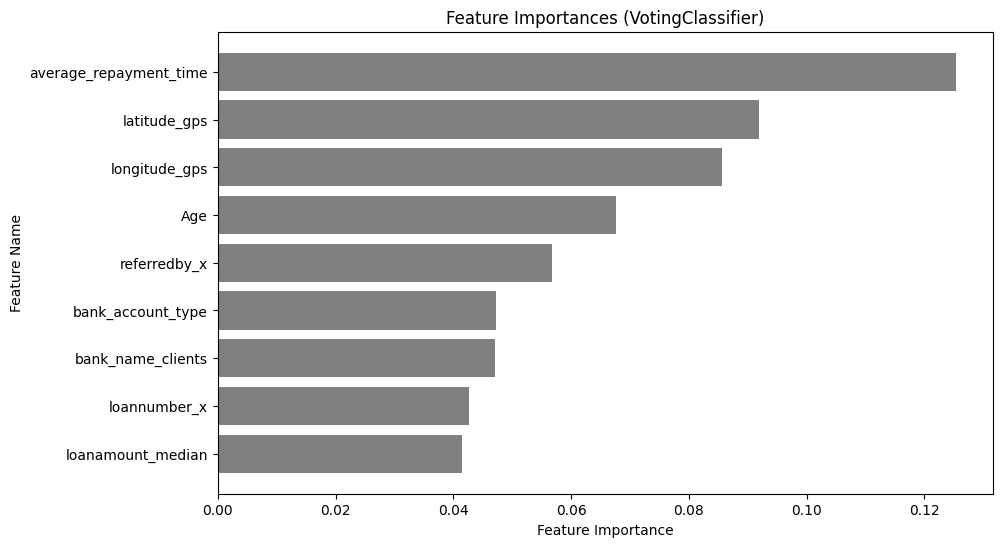

In [ ]:
# Get feature importances (assuming RandomForestClassifiers are used)
fi1 = clf_rf1.feature_importances_
fi2 = clf_rf2.feature_importances_
fi3 = clf_rf3.named_steps['classifier'].feature_importances_
feature_importances = np.mean([fi1, fi2, fi3], axis=0)
values = sorted(zip(feature_names, feature_importances), key=lambda x: x[1] * -1)
values
indices = np.argsort(feature_importances)[::-1]

# Sort indices by importance
#indices = np.argsort(feature_importances)
# Sort indices by importance and select the top 10
indices = np.argsort(feature_importances)[-9:]

# Define colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(indices)))


# Set a single color for all bars
color = 'grey'

# Plotting with a single color
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(indices)), feature_importances[indices], color=color)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances (VotingClassifier)")

plt.show()

## Predict the Test Split

In [ ]:
y_pred_rf = cclf.predict(X_test)

# Performance metrics



## Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

# Access individual elements of the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Print the instances
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Access instances in each section
true_negatives = X_test[(y_test == 0) & (y_pred_rf == 0)]
false_positives = X_test[(y_test == 0) & (y_pred_rf == 1)]
false_negatives = X_test[(y_test == 1) & (y_pred_rf == 0)]
true_positives = X_test[(y_test == 1) & (y_pred_rf == 1)]

# Print the lengths of each section
print(f"True Negatives: {len(true_negatives)} instances")
print(f"False Positives: {len(false_positives)} instances")
print(f"False Negatives: {len(false_negatives)} instances")
print(f"True Positives: {len(true_positives)} instances")

[[ 38 170]
 [ 27 637]]
True Negatives: 38
False Positives: 170
False Negatives: 27
True Positives: 637
True Negatives: 38 instances
False Positives: 170 instances
False Negatives: 27 instances
True Positives: 637 instances


In [ ]:
print("True Negatives")
TN =true_negatives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']]
TN # debug and view in data viewer
#true_negatives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']].mean()

print("False Positives")
FP = false_positives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']]
FP
#false_positives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']].mean()

print("False Negatives")
FN = false_negatives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']]
FN
#false_negatives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']].mean()

print("True Positives")
TP = true_positives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']]
TP
#true_positives[['average_repayment_time', 'latitude_gps', 'longitude_gps', 'Age', 'referredby_x', 'bank_account_type', 'bank_name_clients', 'loannumber_x', 'loanamount_median']].mean()

True Negatives


,average_repayment_time,latitude_gps,longitude_gps,Age,referredby_x,bank_account_type,bank_name_clients,loannumber_x,loanamount_median
252,36.654645,6.591498,3.260152,51,0,2,10,4,10000.0
3053,24.188692,7.216621,3.446584,25,1,2,6,2,10000.0
1588,21.740324,8.464256,4.576468,22,1,2,17,2,10000.0
1302,38.828495,6.574438,3.367368,34,0,2,6,2,10000.0
1174,56.795667,6.178192,6.953346,43,0,1,3,6,10000.0
2380,56.363762,6.653188,3.325616,33,0,2,12,2,10000.0
4073,38.959225,10.438374,7.418026,27,0,2,6,2,10000.0
862,12.159549,7.110435,4.854494,25,0,2,13,2,10000.0
881,35.957946,7.608215,5.281037,36,0,2,5,3,10000.0
4283,151.439988,7.818093,6.081324,36,0,2,13,4,10000.0


False Positives


,average_repayment_time,latitude_gps,longitude_gps,Age,referredby_x,bank_account_type,bank_name_clients,loannumber_x,loanamount_median
2346,32.078792,4.735293,7.031917,34,0,2,13,9,10000.0
2684,32.396165,8.481319,4.550355,33,0,1,6,9,25000.0
1504,31.874664,6.668762,3.516469,37,1,2,14,2,10000.0
937,17.414514,6.624832,3.377158,31,0,2,6,4,10000.0
2083,29.583657,6.893960,3.709818,52,0,0,12,4,10000.0
...,...,...,...,...,...,...,...,...,...
1697,34.269699,6.538062,3.373197,39,0,2,6,2,10000.0
3944,31.787344,6.635049,3.345346,33,0,2,4,3,10000.0
2609,38.093748,4.909852,7.010054,31,0,1,5,8,20000.0
4155,27.062396,7.432965,3.835157,28,0,1,5,7,10000.0


False Negatives


,average_repayment_time,latitude_gps,longitude_gps,Age,referredby_x,bank_account_type,bank_name_clients,loannumber_x,loanamount_median
2460,23.779915,8.992090,7.464009,31,0,2,6,4,10000.0
4344,33.526644,6.604714,3.487378,33,0,2,5,2,10000.0
1812,30.282025,4.838223,6.985655,23,0,2,1,2,10000.0
1536,36.079190,4.913823,6.298133,35,0,2,5,2,10000.0
3992,33.270324,6.673669,3.300556,41,1,2,1,2,10000.0
879,27.904117,7.198314,8.121397,43,0,1,5,4,10000.0
1592,22.785952,8.483969,4.557768,33,0,2,6,5,10000.0
3495,31.002222,9.055596,7.497580,32,1,2,13,2,10000.0
1717,35.785515,4.831319,6.964879,29,0,2,6,3,10000.0
2409,16.714340,6.591119,3.384405,26,1,2,6,2,10000.0


True Positives


,average_repayment_time,latitude_gps,longitude_gps,Age,referredby_x,bank_account_type,bank_name_clients,loannumber_x,loanamount_median
1509,16.717002,6.555519,3.375644,31,0,1,5,10,20000.0
2232,17.756400,6.428549,3.459775,27,0,2,17,11,20000.0
643,47.195038,9.883527,8.872980,36,0,1,6,5,10000.0
3917,25.293970,7.390172,3.881388,35,0,2,5,6,10000.0
1515,26.212846,6.602128,3.382807,35,0,2,6,8,10000.0
...,...,...,...,...,...,...,...,...,...
1051,25.934821,6.443758,3.406201,39,0,1,0,6,10000.0
809,21.016582,5.529166,5.758438,52,0,2,13,8,10000.0
682,19.664190,6.608524,3.373377,34,0,2,6,2,10000.0
2073,26.990289,8.996478,7.418562,26,1,2,13,2,10000.0


In [ ]:
from sklearn.metrics import classification_report
#class_names = [str(x) for x in ccl1.classes_]
#print(classification_report(y1_2_test, y1_pred_rf, target_names=class_names))
#print(classification_report(y1_2_test, y2_pred_rf, target_names=class_names))

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.18      0.28       208
           1       0.79      0.96      0.87       664

    accuracy                           0.77       872
   macro avg       0.69      0.57      0.57       872
weighted avg       0.74      0.77      0.73       872



In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rf)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rf)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_rf)))

Accuracy = 0.77
Kappa = 0.19
F1 Score = 0.87
Log Loss = 8.14


In [ ]:
""" import shap
explainer = shap.KernelExplainer(cclf.predict, X_train, keep_index=True)

# Choose a specific instance
instance_idx = 252
instance = X_test.iloc[instance_idx]


# Get SHAP values for the specific instance
shap_values_instance = explainer.shap_values(instance)

# Summary plot for the specific instance
shap.summary_plot(shap_values_instance, instance, feature_names=feature_names) """

Using 3487 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


UnboundLocalError: cannot access local variable 'column_name' where it is not associated with a value

In [ ]:
from sklearn.model_selection import cross_validate
inner_cv_scores = cross_validate(cclf, X, y,
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=15,
                                 verbose=0,
                                 return_train_score=True)
cv_scores=inner_cv_scores['test_score'].tolist()
fit_times=inner_cv_scores['fit_time'].tolist()
# duration = time.time() - start

print("CV Scores:")
print(["{:0.4f}".format(cv_score) for cv_score in cv_scores])
print("CV Score mean: {:.4f} ".format(np.mean(cv_scores)))
print("CV Score range: {:0.4f} -- {:0.4f}".format(np.mean(cv_scores) - np.std(cv_scores), np.mean(cv_scores) + np.std(cv_scores)))
# print("Total duration: {}".format(duration))

CV Scores:
['0.7890', '0.7970', '0.7890', '0.7729', '0.7991']
CV Score mean: 0.7894 
CV Score range: 0.7802 -- 0.7986


## Make the Predictions

In [ ]:
# make the predictions

#y1_2_predict = eclf.fit(X1_2, y1_2).predict(X1_2_predict)
#y3_predict = eclf.fit(X3, y3).predict(X3_test_tosubmit)

#y1_2_predict = eclf.fit(X1_2, y1_2).predict(X1_2_predict)
y_predict = cclf.predict(X_predict)

## Create the submission

In [ ]:
submission_df = pd.DataFrame({'customer_id':customer_id_predict, 'Good_Bad_flag':y_predict})
submission_df

,customer_id,Good_Bad_flag
0,8a858899538ddb8e015390510b321f08,1
1,8a858959537a097401537a4e316e25f7,1
2,8a8589c253ace09b0153af6ba58f1f31,1
3,8a858e095aae82b7015aae86ca1e030b,1
4,8a858e225a28c713015a30db5c48383d,1
...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,1
1446,8a858fcb5b00cc54015b0253ced26a5f,1
1447,8a858fde56eb02280156f59b976d46c0,1
1448,8a858e10570f2d65015717fcfec44996,1


In [ ]:
submission_df.Good_Bad_flag.value_counts()

1    1332
0     118
Name: Good_Bad_flag, dtype: int64

## Save the submission to CSV

In [ ]:
#submissionPath = "EnsembleVoting_RFx3_submission_1_Team_Bay.csv"
submissionPath = "EnsembleVoting_RFx3_submission_1.1_Team_Bay.csv" # fixed data leakage in Label Encoding, voting = soft
#submissionPath = "EnsembleVoting_RFx3_submission_1.2_Team_Bay.csv" # voting = hard (not soft), Zindi score is worse
print(submissionPath)
submission_df.to_csv(submissionPath, index=False)

EnsembleVoting_RFx3_submission_1.1_Team_Bay.csv
